In [1]:
import random_graph
import subprocess
import statistics
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import random

def random_matrix(number, path, max_len = 100):
    result = []

    for _ in range(number):
        result.append(["0"] * number)

    for i in range(number):
        for j in range(number):
            if i == j:
                continue

            result[i][j] = str(random.randint(1, max_len))
            result[j][i] = result[i][j]

    with open(path, 'w', encoding='utf-8') as file:
        file.write("\n".join(",".join(row) for row in result))

def run_command(command):
    output = subprocess.run(command.split(" "), stdout=subprocess.PIPE, stderr=subprocess.PIPE, check=True) 
    return output.stdout.decode('utf-8')


In [10]:
ga_exec = "../cmake-build-release/sizeThreadTest"
# abs_exec = "../"
gen_nums = [1, 10, 20, 50, 100, 200, 500, 700, 1000]
node_nums = [10, 25, 50, 70, 100, 200, 500, 700, 1000]
repetitions = 10

path = "../data/temp_graph.csv"

# test_ga.exe path gen_num  => time dist
# held_carp.exe path        => time dist
# gen_data[node_nums][den_nums]
gen_data = {nodes : {gens : {"time": 0.0, "dist": 0.0} for gens in gen_nums} for nodes in node_nums}

for node in node_nums:
    print("nodes: " + str(node))
    for _ in range(repetitions):
        random_matrix(node, path)
        
        # command = abs_exec + " " + path
        # abs_res = float(run_command(command).split("\r\n")[1])
        for gen in gen_nums:
            command = ga_exec + " " + path + " " + str(gen) + " " + str(8)
            res = run_command(command)
            time, dist = res.split("\n")[:2]
            # print(str(gen) + ":\t" + str(dist))
            gen_data[node][gen]["dist"] += float(dist)
            gen_data[node][gen]["time"] += float(time)
    
    for gen in gen_nums:
        gen_data[node][gen]["dist"] /= repetitions
        gen_data[node][gen]["time"] /= repetitions

nodes: 10
nodes: 25
nodes: 50
nodes: 70
nodes: 100
nodes: 200
nodes: 500
nodes: 700
nodes: 1000


In [11]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

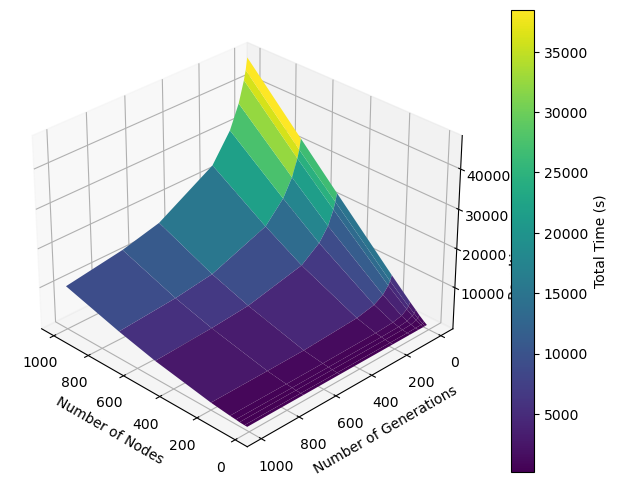

In [12]:
# Create meshgrid for X and Y
X, Y = np.meshgrid(node_nums, gen_nums)

# Calculate Z values (total time)
Z = np.zeros_like(X, dtype=float)
for i, gen in enumerate(gen_nums):
    for j, node in enumerate(node_nums):
        Z[i, j] = gen_data[node][gen]["dist"]
        # Z[i, j] = gen_data[node][gen]["time"]

# Plotting the 3D graph
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# Plot surface
surf = ax.plot_surface(X, Y, Z, cmap='viridis')
fig.colorbar(surf, label='Total Time (s)')

# Set labels and title
ax.set_xlabel('Number of Nodes')
ax.set_ylabel('Number of Generations')
ax.set_zlabel('Resulting Distance')

ax.view_init(azim=135)
# ax.view_init(azim=90, elev=0)
# ax.set_title('Total Time for Indexing and Merging with Varying Threads')

plt.show()

In [24]:
ga_exec = "../cmake-build-release/sizeThreadTest"
# abs_exec = "../"
thread_nums = [1, 2, 3, 4, 5, 6, 8, 10, 15, 25, 50, 100]
node_nums = [10, 50, 100, 200, 500, 700]
repetitions = 1

path = "../data/temp_graph.csv"

# test_ga.exe path gen_num  => time dist
# gen_data[node_nums][den_nums]
gen_data = {nodes : {threads : {"time": 0.0, "dist": 0.0} for threads in thread_nums} for nodes in node_nums}

for node in node_nums:
    print("nodes: " + str(node))
    for _ in range(repetitions):
        random_matrix(node, path)
        
        # command = abs_exec + " " + path
        # abs_res = float(run_command(command).split("\r\n")[1])
        for threads in thread_nums:
            command = ga_exec + " " + path + " " + str(10000) + " " + str(threads)
            res = run_command(command)
            time, dist = res.split("\n")[:2]
            # print(str(gen) + ":\t" + str(dist))
            gen_data[node][threads]["dist"] += float(dist)
            gen_data[node][threads]["time"] += float(time)
    
    for threads in thread_nums:
        gen_data[node][threads]["dist"] /= repetitions
        gen_data[node][threads]["time"] /= repetitions

nodes: 10
nodes: 50
nodes: 100
nodes: 200
nodes: 500
nodes: 700


In [29]:
gen_data

{10: {1: {'time': 8978.0, 'dist': 214.0},
  2: {'time': 6721.0, 'dist': 214.0},
  3: {'time': 8306.0, 'dist': 214.0},
  4: {'time': 9190.0, 'dist': 214.0},
  5: {'time': 10051.0, 'dist': 241.0},
  6: {'time': 10786.0, 'dist': 214.0},
  8: {'time': 11672.0, 'dist': 214.0},
  10: {'time': 12758.0, 'dist': 214.0},
  15: {'time': 14277.0, 'dist': 214.0},
  25: {'time': 15441.0, 'dist': 214.0},
  50: {'time': 24014.0, 'dist': 214.0},
  100: {'time': 29972.0, 'dist': 214.0}},
 50: {1: {'time': 12132.0, 'dist': 309.0},
  2: {'time': 8805.0, 'dist': 275.0},
  3: {'time': 10031.0, 'dist': 282.0},
  4: {'time': 10844.0, 'dist': 316.0},
  5: {'time': 11595.0, 'dist': 271.0},
  6: {'time': 12219.0, 'dist': 313.0},
  8: {'time': 12811.0, 'dist': 298.0},
  10: {'time': 13691.0, 'dist': 279.0},
  15: {'time': 15419.0, 'dist': 290.0},
  25: {'time': 16486.0, 'dist': 328.0},
  50: {'time': 26213.0, 'dist': 305.0},
  100: {'time': 29891.0, 'dist': 322.0}},
 100: {1: {'time': 17675.0, 'dist': 373.0},
  2

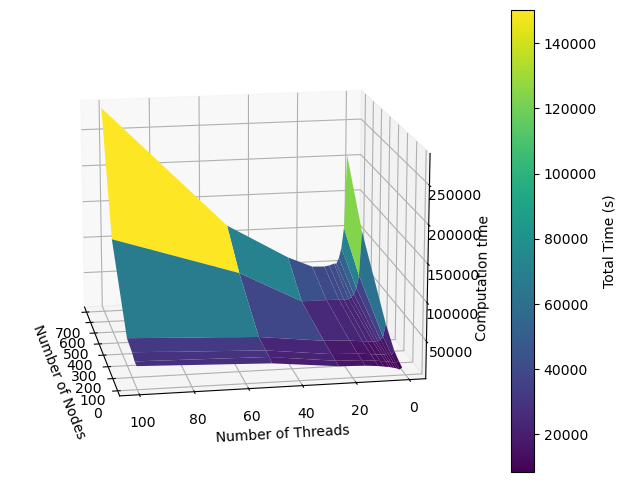

In [36]:
thread_nums = [1, 2, 3, 4, 5, 6, 8, 10, 15, 25, 50, 100]
node_nums = [10, 50, 100, 200, 500, 700]

# Create meshgrid for X and Y
X, Y = np.meshgrid(node_nums, thread_nums)

# Calculate Z values (total time)
Z = np.zeros_like(X, dtype=float)
for i, threads in enumerate(thread_nums):
    for j, node in enumerate(node_nums):
        # Z[i, j] = gen_data[node][threads]["dist"]
        Z[i, j] = gen_data[node][threads]["time"]

# Plotting the 3D graph
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# Plot surface
surf = ax.plot_surface(X, Y, Z, cmap='viridis')
fig.colorbar(surf, label='Total Time (s)')

# Set labels and title
ax.set_xlabel('Number of Nodes')
ax.set_ylabel('Number of Threads')
ax.set_zlabel('Computation time')

# ax.view_init(azim=135)
ax.view_init(azim=170, elev=15)
# ax.set_title('Total Time for Indexing and Merging with Varying Threads')

plt.show()